## Рассмотрим сложную математическую функцию на отрезке [1, 15]:
f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.


In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

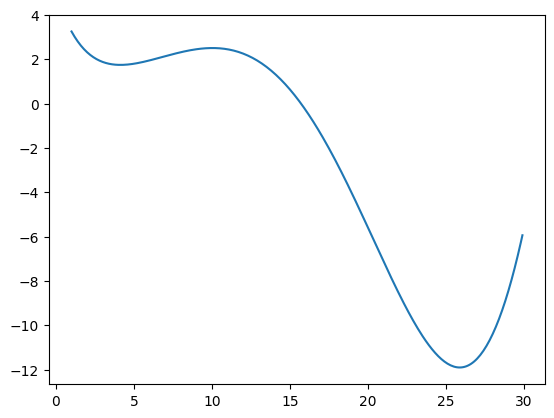

In [11]:

def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

data_x = np.arange(1, 30, 0.1)
data_y = [f(x) for x in data_x]

plt.plot(data_x, data_y)
plt.show()

In [3]:
# Аппроксимация в заданных точках (не стесняйтесь экспериментировать)
points = np.array([1, 4, 10, 15])
n = points.size
print(n)

4


In [4]:
# Заполняем А-матрицу
A = np.zeros((n, n))
for index in range(0, n):
    A[index] = np.power(np.full(n, points[index]), np.arange(0, n, 1))
# заполняем b-матрицу, т.е. значение функции в заданных точках
b = f(points)
print(b)

[3.25221687 1.74684595 2.50541641 0.63522142]


In [5]:
# получаем апроксимированные полиномиальные коэффициенты
solve = np.linalg.solve(A,b)
print(solve)

[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


In [9]:
# определяем апроксимацию функции
def polinom(x): 
    tiles = np.tile(x, (n, 1))
    tiles[0] = np.ones(x.size)
    for index in range(1, n):
        tiles[index] = tiles[index]**index
    return solve.dot(tiles)

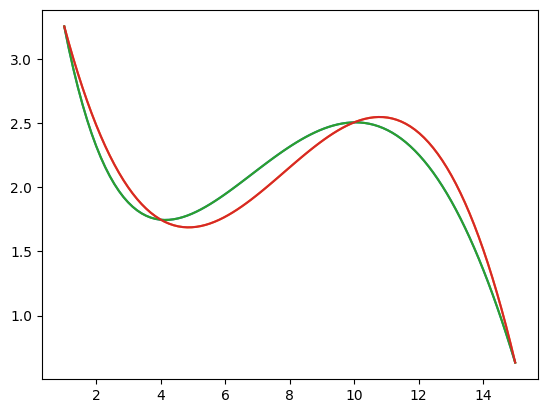

In [8]:
# сопоставляем графики оригинальной функции и апроксимированной
x = np.linspace(1, 15, 100)
plt.plot(x, f(x))
plt.plot(x, polinom(x))
plt.show()